# Task-2   Predictive Model 

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r"C:\Users\ebint\Downloads\customer_booking.csv"
path = path.replace("\\","/")
print(path)

C:/Users/ebint/Downloads/customer_booking.csv


In [3]:
data = pd.read_csv(path,encoding="latin")

## Understanding Data

In [4]:
data.shape

(50000, 14)

In [5]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


# EDA

### Num Passengers

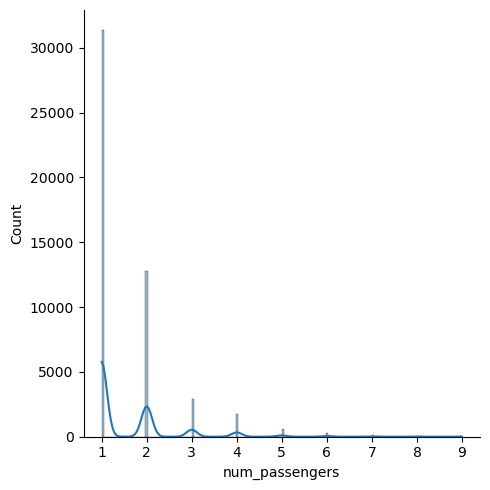

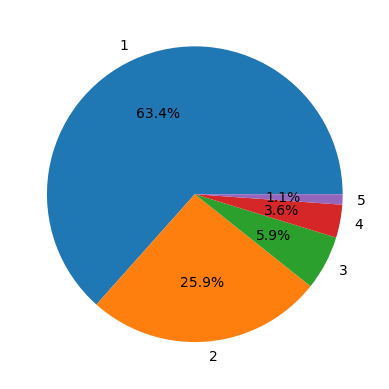

In [8]:
sns.displot(data['num_passengers'], kde=True)
plt.show()

x = data["num_passengers"].value_counts().values[:5]
y = data["num_passengers"].value_counts().index[:5]
    
plt.pie(x,labels=y,autopct='%1.1f%%')
plt.show()

In [9]:
# Observations

# Out of all flight travels 63.84% of travellers travel alone

# 25.9% of travellers travel in pairs

# Only 10% of the passengers travel in groups(more than 2)

### Sales Channel

			 88.764


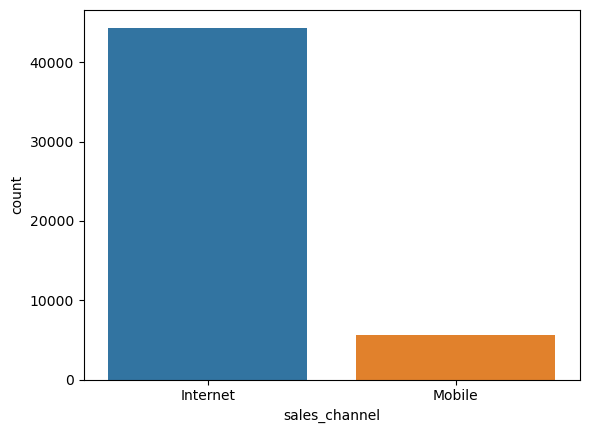

In [10]:
print("\t\t\t",data["sales_channel"].value_counts()[0]/len(data)*100)
sns.countplot(x='sales_channel',data=data)
plt.show()

In [11]:
# Observation

# alomost 88% percentage of the customers prefer booking tickets through online 

### Trip Type

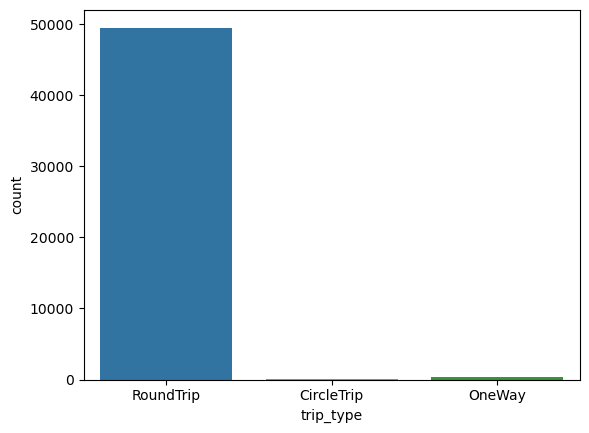

In [12]:
sns.countplot(x='trip_type',data=data)
plt.show()

In [13]:
# Observation

# Round-trip tickets are flights from and back to the same location of origin

# A one-way ticket, on the other hand, only allows you to fly to your destination, not back from it

### Length of Stay

In [14]:
data["length_of_stay"].value_counts()[:30].sort_values(ascending=False)

6     7757
5     7286
4     5655
3     2839
17    1849
21    1392
18    1356
22    1285
20    1285
19    1253
29    1040
23     941
2      866
28     851
30     793
27     768
24     765
25     650
31     634
26     600
32     456
33     421
34     394
35     383
36     373
37     284
1      261
38     249
41     249
42     230
Name: length_of_stay, dtype: int64

In [15]:
# From the stats above we can find that most of the travellers spent less than 2 months in the destination

# This impacts the trip type beacuse travellers are sure that they'll come back to their to boarding place

# This correlates with the fact that most of the trip type is return back

### Purchase Lead

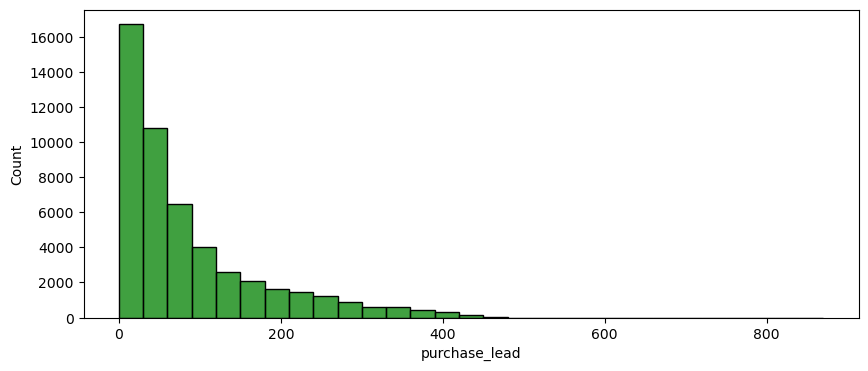

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(data=data,x=data["purchase_lead"],binwidth=30,color="green")
plt.show()

In [17]:
(data["purchase_lead"] < 30).sum()/len(data) * 100

33.442

In [18]:
(data["purchase_lead"] < 60).sum()/len(data) * 100

55.066

In [19]:
# Observations

# More than 33.44% of customers book one month before travel

# More than 55.06% of customers book two months before travel

### Flight Departure

In [20]:
data["flight_hour"].value_counts().head()

8     3165
12    3163
9     3132
7     3126
11    3110
Name: flight_hour, dtype: int64

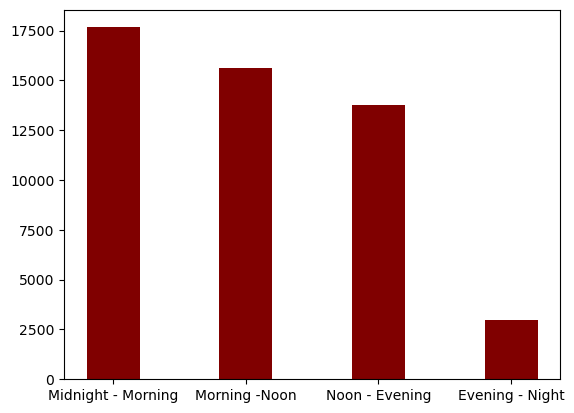

In [21]:
midnight_morning=0
morning_noon=0
noon_evening=0
evening_midnight=0

temp_data = dict(data["flight_hour"].value_counts())
temp_data.keys()

for i in temp_data.keys():

    if (i>=0 and i<7):
        midnight_morning = midnight_morning + temp_data[i]
        
    if(i>=7 and i<12):
        morning_noon = morning_noon + temp_data[i]
        
    if(i>=12 and i<18):
        noon_evening = noon_evening + temp_data[i]
        
    if(i>=18 and i<24):
        evening_midnight = evening_midnight + temp_data[i]
     

x = ["Midnight - Morning", "Morning -Noon","Noon - Evening","Evening - Night"]
y = [midnight_morning,morning_noon,noon_evening,evening_midnight]
plt.bar(x, y, color ='maroon', width = 0.4)
plt.show()

In [22]:
# From the graph we can understand that the number of flights decreases as the day progresses

### Flight Day

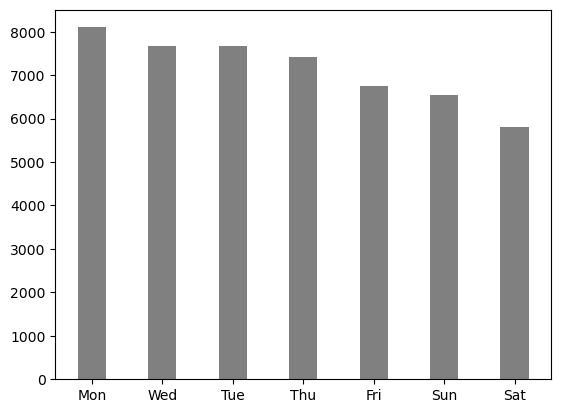

In [23]:
x = data["flight_day"].value_counts().index
y = data["flight_day"].value_counts().values
plt.bar(x, y, color ='grey', width = 0.4)
plt.show()

## Booking Origin

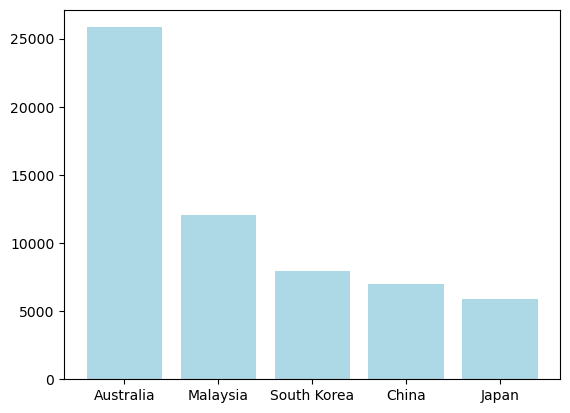

In [24]:
# Top 5 booking origin locations based no of customers
customers = data.groupby("booking_origin")["num_passengers"].sum().sort_values(ascending=False)[:5]

x = customers.values
y = customers.index

plt.bar(y,x, color ='lightblue')
plt.show()

## Routes

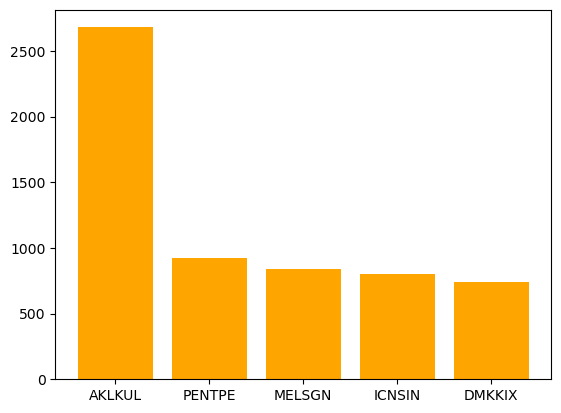

In [25]:
# Top 5 Busiest Routes
busiest_routes = data["route"].value_counts().sort_values(ascending=False)[:5]

x = busiest_routes.values
y = busiest_routes.index

plt.bar(y,x, color ='orange')
plt.show()

### Flight Duration

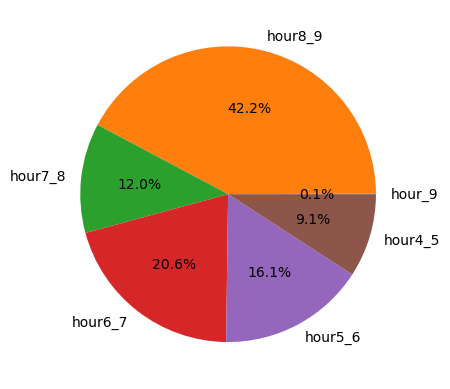

In [26]:
flight_duration = dict(data["flight_duration"].value_counts())

hour_9 = 0 
hour8_9 = 0 
hour7_8 = 0
hour6_7 = 0
hour5_6 = 0
hour4_5 = 0

for hour in flight_duration:
    if hour>9:
        hour_9 = hour_9 + flight_duration[hour]
    
    if hour>=8.0 and hour<=9.0:
        hour8_9 = hour8_9 + flight_duration[hour]
        
    if hour>=7.0 and hour<=8.0:
        hour7_8 = hour7_8 + flight_duration[hour]
        
    if hour>=6.0 and hour<=7.0:
        hour6_7 = hour6_7 + flight_duration[hour]
        
    if hour>=5.0 and hour<=6.0:
        hour5_6 = hour5_6 + flight_duration[hour]
    
    if hour>=4.0 and hour<=5.0:
        hour4_5 = hour4_5 + flight_duration[hour]
           
y = ["hour_9", "hour8_9","hour7_8","hour6_7","hour5_6","hour4_5"]
x = [hour_9, hour8_9, hour7_8, hour6_7, hour5_6, hour4_5] 

plt.pie(x,labels=y,autopct='%1.1f%%')
plt.show()

In [27]:
# From this pie chart we can easily infer that 

# flying hours 8 to 9 contribute 42.2% of the flying time
# flying hours 6 to 7 contribute 20.6% of the flying time
# flying hours 5 to 6 contribute 16.1% of the flying time
# flying hours 7 to 8 contribute 12.0% of the flying time

# And flight hours more than 9 contribute a very small amount

### Multivaraite Analysis

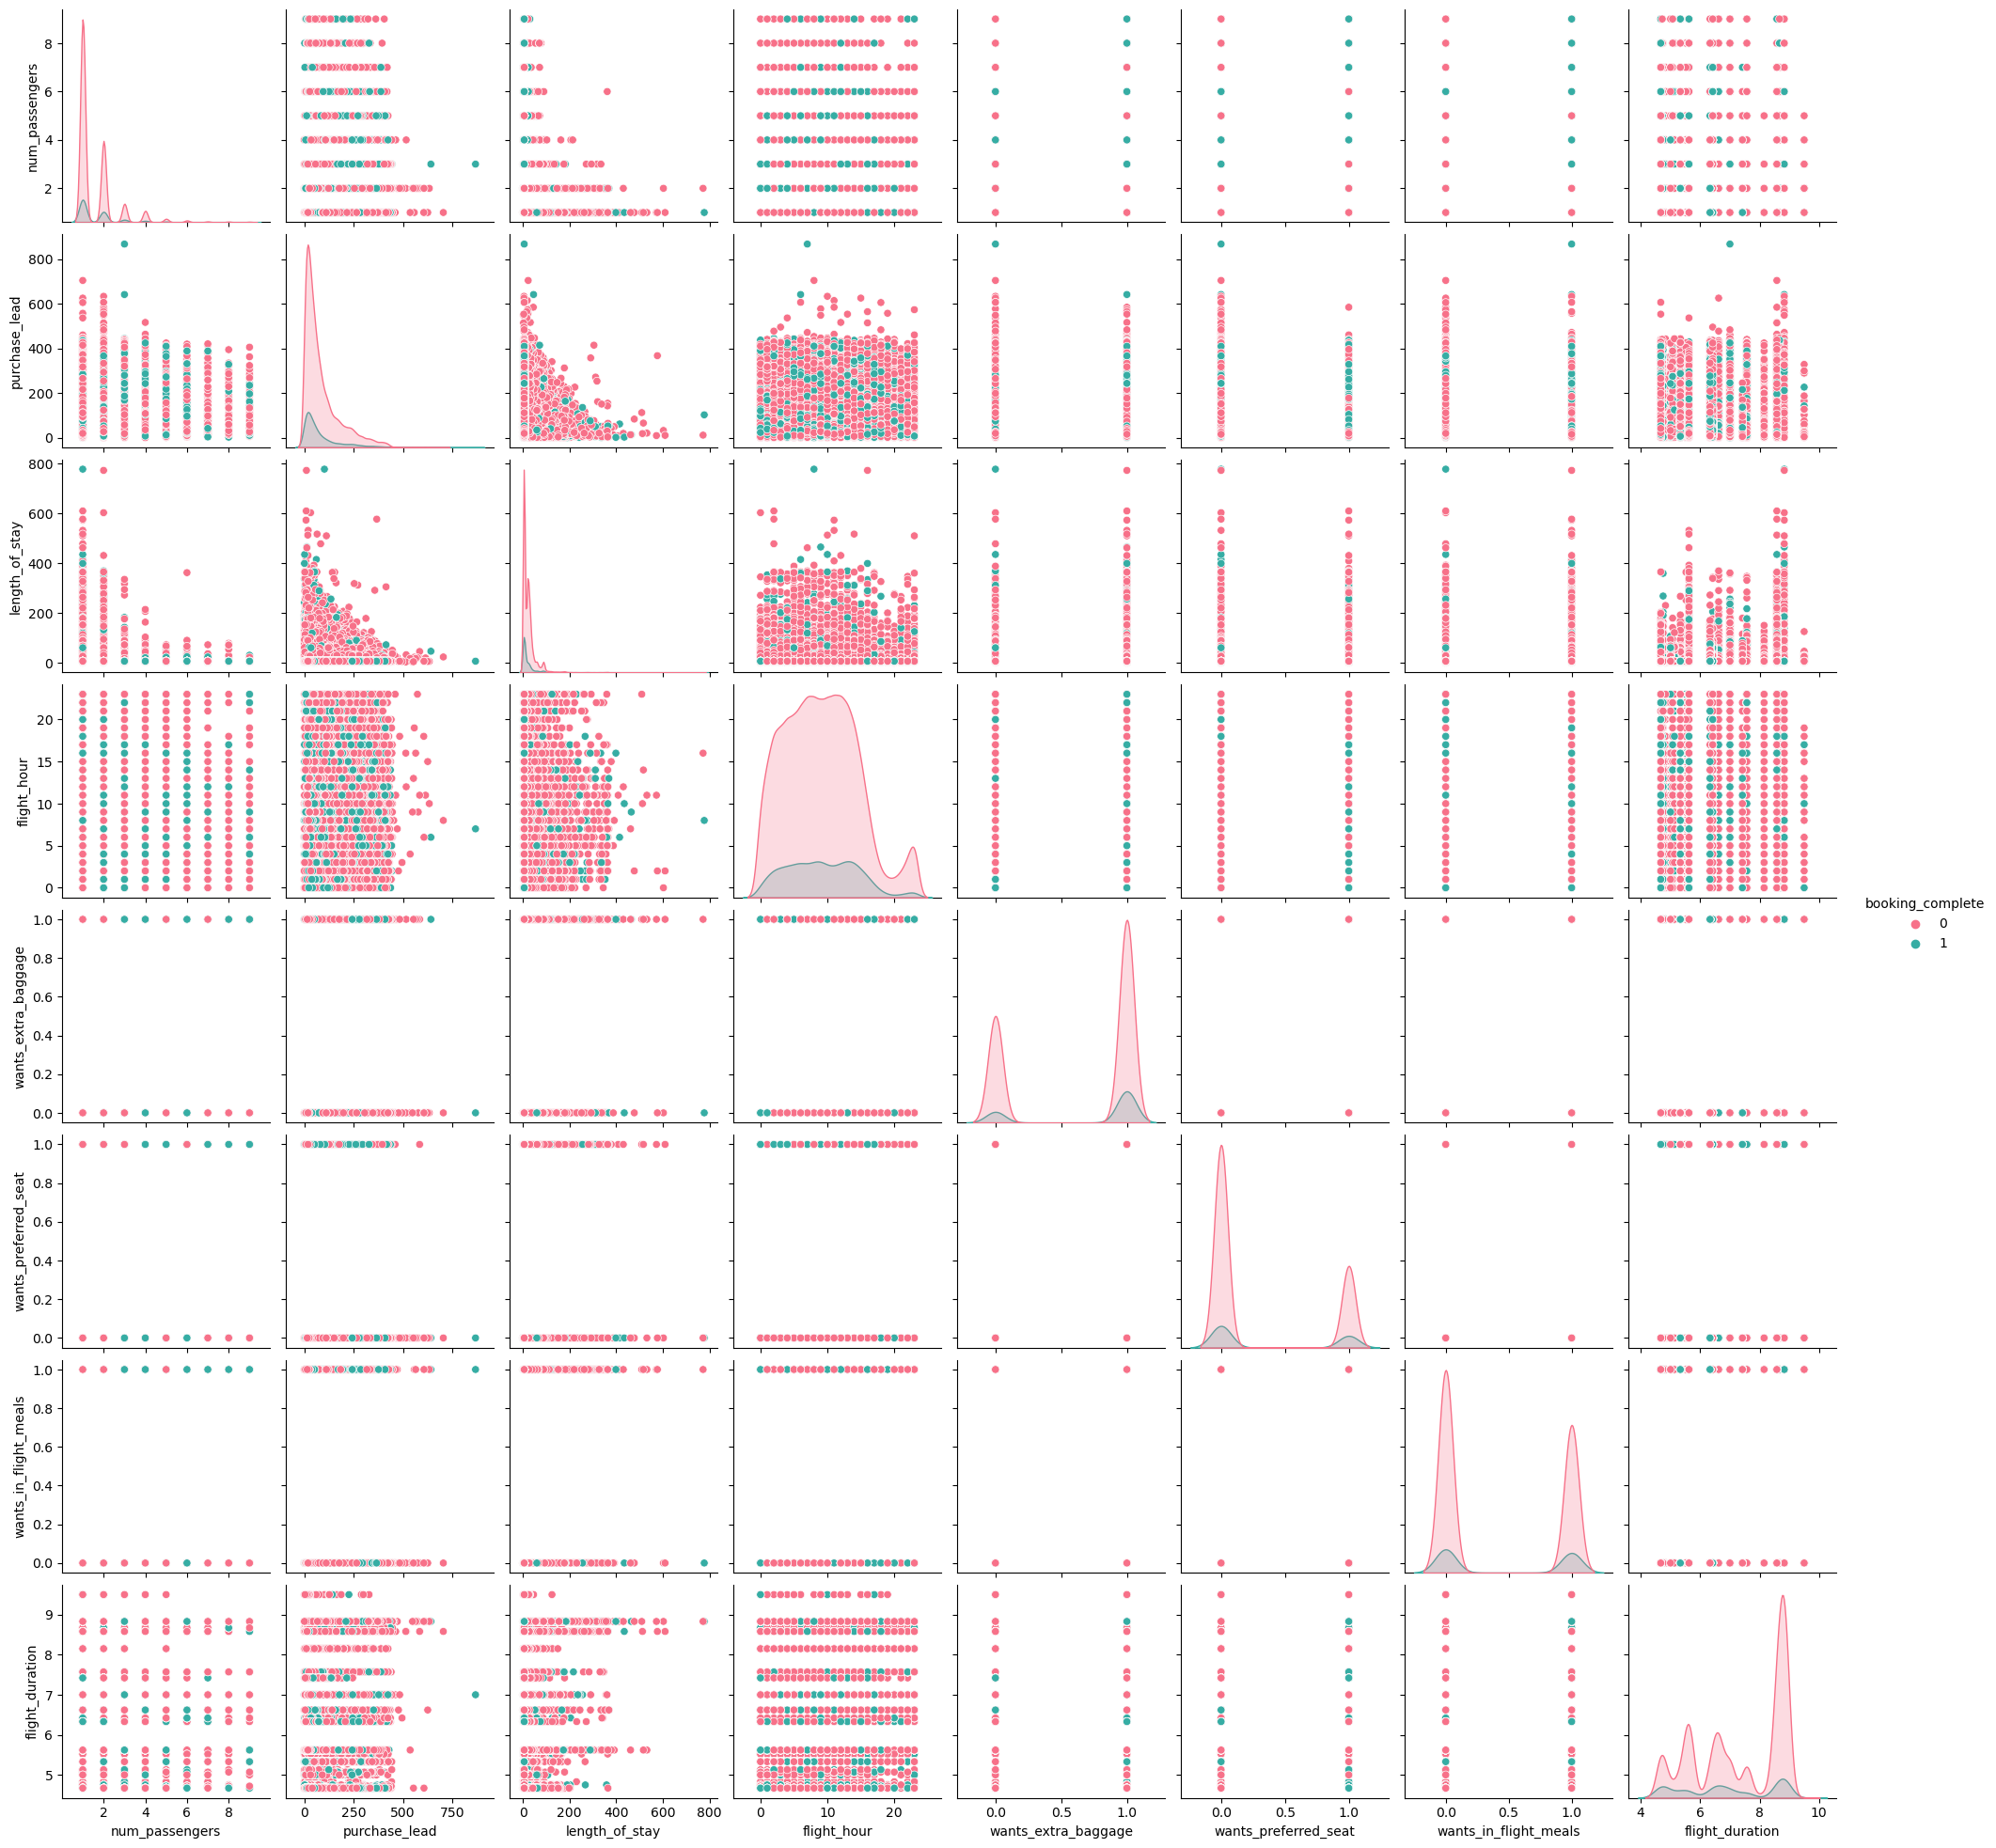

In [33]:
sns.pairplot(data, hue = "booking_complete", palette="husl")

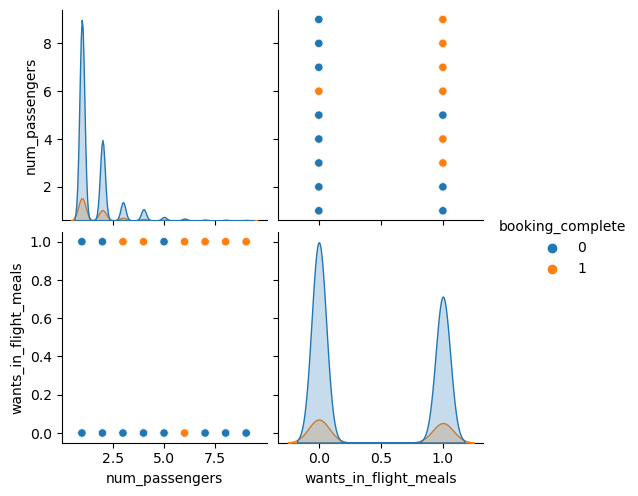

In [61]:
sns.pairplot(data, vars= ["num_passengers","wants_in_flight_meals"], hue = "booking_complete")

# Feature Engineering

### 1)   From data.info We Found That We Don't Have Any Null Values

In [28]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### 2) Checking for Data Imbalance

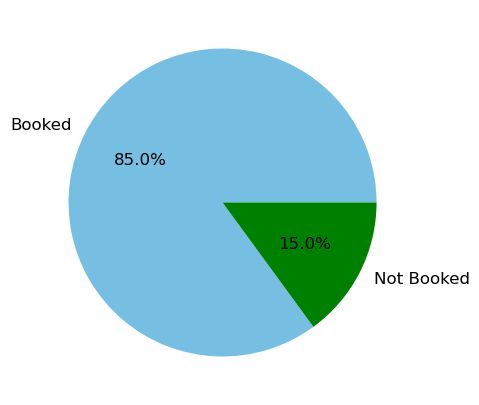

0    42522
1     7478
Name: booking_complete, dtype: int64

In [29]:
x = data["booking_complete"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x.values,labels=("Booked","Not Booked"),autopct='%1.1f%%',textprops={'fontsize':12}, colors = ["#77BFE2","green"])
plt.show()

data["booking_complete"].value_counts()

# Our Dataset is Highly imbalanced

### 3) Correlation Matrix of Quantitative Features

C:\Users\ebint\AppData\Local\Temp\ipykernel_13140\3055487512.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap='Blues')


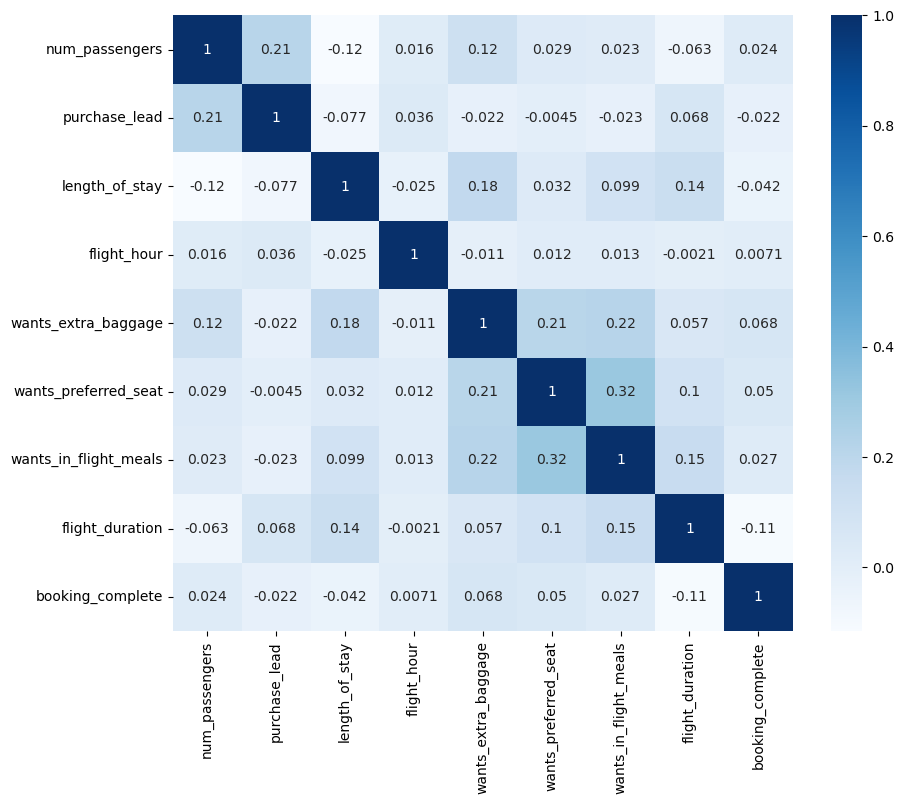

In [36]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.show()

In [ ]:
# Observation

# We can find that the independent quantitative features have very low linear correlation with each other

### 4) Feature Selection

In [37]:
x_temp = data.drop(columns=['booking_complete'] ,axis=1)
y_temp = data["booking_complete"]         

# Converting non int feature dtypes to int
for column in x_temp.select_dtypes("object"):
    x_temp[column], not_used = x_temp[column].factorize()
    
x_temp

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,638,36,1,0,1,5.62
49996,1,0,0,111,6,4,4,638,36,0,0,0,5.62
49997,1,0,0,24,6,22,0,638,36,0,0,1,5.62
49998,1,0,0,15,6,11,3,638,36,1,0,1,5.62


In [38]:
from sklearn.feature_selection import mutual_info_classif

In [39]:
mi_score = mutual_info_classif(x_temp, y_temp,random_state=13)
mi_score = pd.Series(mi_score, name="Mutual Information", index=x_temp.columns)
mi_score = mi_score.sort_values(ascending=False)

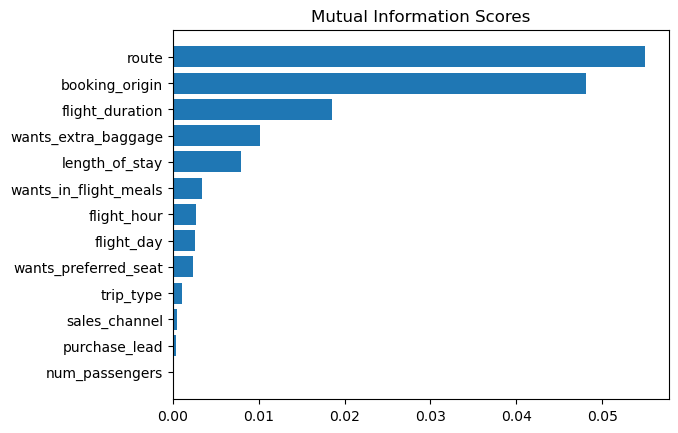

In [40]:
mi_score = mi_score.sort_values(ascending=True)
width = np.arange(len(mi_score))
ticks = list(mi_score.index)
plt.barh(width, mi_score)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
plt.show()
features = ["booking_origin","flight_duration","wants_extra_baggage","length_of_stay"]

### 5) Handling Imbalance

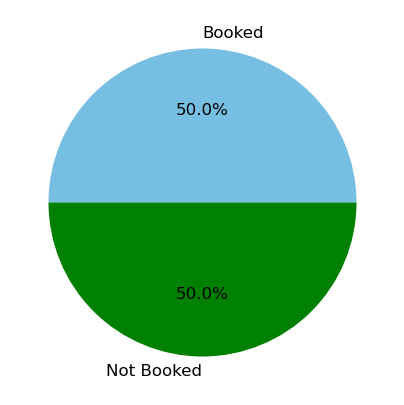

In [41]:
from imblearn.under_sampling import RandomUnderSampler 
rs = RandomUnderSampler(random_state=42)

#print('Original dataset shape %s' % Counter(y))

x_balanced, y_balanced = rs.fit_resample(data[features], data["booking_complete"])

plt.figure(figsize=(5,5))
plt.pie(y_balanced.value_counts(),labels=("Booked","Not Booked"),autopct='%1.1f%%',textprops={'fontsize':12}, colors = ["#77BFE2","green"])
plt.show()

In [42]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [43]:
x_balanced.head()

,booking_origin,flight_duration,wants_extra_baggage,length_of_stay
0,Japan,7.00,0,6
1,Australia,8.83,1,22
2,France,5.52,1,37
3,Japan,7.57,0,5
4,Australia,8.58,1,18


### 6) One Hot Encoding

In [44]:
# for imbalanced
x_enc = pd.get_dummies(data[features], columns=features,drop_first=True)
print(x_enc.shape)

(50000, 458)


In [45]:
# for balanced
x_bal_enc = pd.get_dummies(x_balanced, columns=features,drop_first=True)
print(x_bal_enc.shape)

(14956, 338)


### 7) Standardisation

In [46]:
# for imbalanced
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_enc)
x_scaled.shape

(50000, 458)

In [47]:
# for balanced
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_bal_scaled = scaler.fit_transform(x_bal_enc)
x_bal_scaled.shape

(14956, 338)

### 6) Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, data["booking_complete"], test_size = 0.2, random_state = 13)
print(f"x train: {x_train.shape} x test: {x_test.shape}")
print(f"y train: {y_train.shape} y test: {y_test.shape}")

x train: (40000, 458) x test: (10000, 458)
y train: (40000,) y test: (10000,)


In [50]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_bal_scaled, y_balanced, test_size = 0.2, random_state = 13)
print(f"x_train_bal: {x_train_bal.shape} x_test_bal: {x_test_bal.shape}")
print(f"y_train_bal: {y_train_bal.shape}\t y_test_bal: {y_test_bal.shape}")

x_train_bal: (11964, 338) x_test_bal: (2992, 338)
y_train_bal: (11964,)	 y_test_bal: (2992,)


# Model 1

#### Decision tree with hyperparameter tunning on imbalanced dataset



ACCURACY:  84.55


ROC AUC:  49.994087038789026


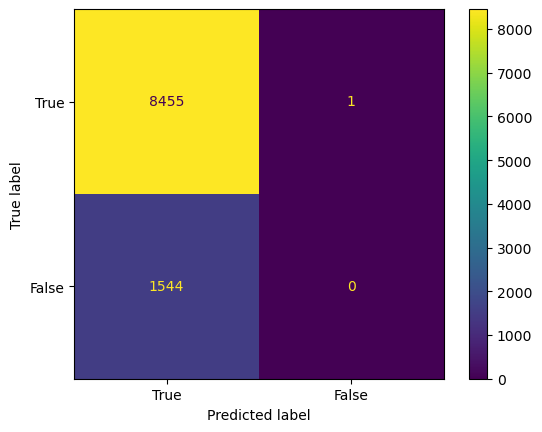

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier()

parameters={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(5,30,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }

grid_search=RandomizedSearchCV(estimator=clf, param_distributions=parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
result = grid_search.best_params_

clf = DecisionTreeClassifier(splitter= result["splitter"], min_samples_split=result["min_samples_split"], min_samples_leaf=result["min_samples_leaf"], max_depth=result["max_depth"], criterion=result["criterion"])
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print('\n\nACCURACY: ',accuracy_score(y_test,y_pred)*100)
print('\n\nROC AUC: ',roc_auc_score(y_test,y_pred)*100)

In [52]:
TP = 8434
FP = 1526
FN = 22
TN = 18
print(f"Precision: {TP/(TP+FP)} Recall: {TP/(TP+FN)}")
print(f"F1 score: {2* (TP/(TP+FP)) * (TP/(TP+FN)) / ((TP/(TP+FP)) + (TP/(TP+FN)))}")

Precision: 0.8467871485943775 Recall: 0.9973982970671712
F1 score: 0.9159426585577759


# Model 2

#### Decision tree with hyperparameter tunning on balanced dataset



ACCURACY:  67.64705882352942


ROC AUC:  67.64516590389017


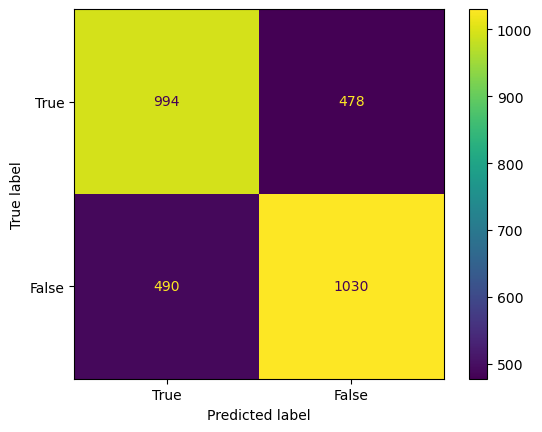

In [53]:
clf = DecisionTreeClassifier()

parameters={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(5,30,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }

grid_search=RandomizedSearchCV(estimator=clf, param_distributions=parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train_bal, y_train_bal)
result = grid_search.best_params_

clf = DecisionTreeClassifier(splitter= result["splitter"], min_samples_split=result["min_samples_split"], min_samples_leaf=result["min_samples_leaf"], max_depth=result["max_depth"], criterion=result["criterion"])
clf.fit(x_train_bal, y_train_bal)
y_pred_bal = clf.predict(x_test_bal)
cfm = confusion_matrix(y_test_bal,y_pred_bal)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print('\n\nACCURACY: ',accuracy_score(y_test_bal,y_pred_bal)*100)
print('\n\nROC AUC: ',roc_auc_score(y_test_bal,y_pred_bal)*100)

In [54]:
TP = 978
FP = 465
FN = 494
TN = 1055
print(f"Precision: {TP/(TP+FP)} Recall: {TP/(TP+FN)}")
print(f"F1 score: {2* (TP/(TP+FP)) * (TP/(TP+FN)) / ((TP/(TP+FP)) + (TP/(TP+FN)))}")

Precision: 0.6777546777546778 Recall: 0.6644021739130435
F1 score: 0.6710120068610633


# Model 3

In [55]:
# Random Forest with hyperparameter tunning on imbalanced dataset



ACCURACY:  84.56


ROC AUC:  50.0


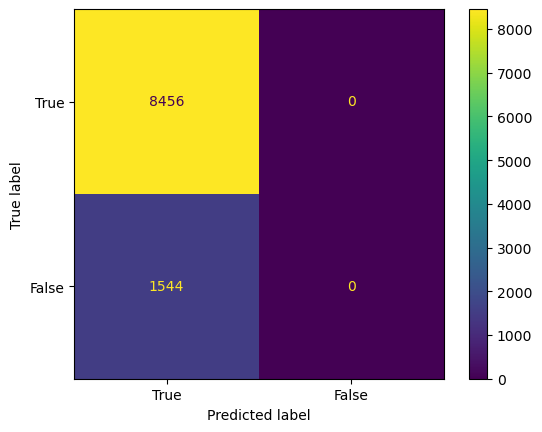

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


rf = RandomForestClassifier()

parameters = {'n_estimators': [20,60,100,120],
               'max_features': [0.2,0.6,1.0],
               'max_depth': [2,8,10,15,20],
              'max_samples':[0.5,0.75,1.0]
             }

random_search = RandomizedSearchCV(estimator = rf, param_distributions = parameters, cv=5, n_jobs = -1)
random_search.fit(x_train, y_train)
output = random_search.best_params_

clf = RandomForestClassifier(n_estimators= output["n_estimators"], max_features=output["max_features"], max_depth=output["max_depth"], max_samples=output["max_samples"])
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print('\n\nACCURACY: ',accuracy_score(y_test,y_pred)*100)
print('\n\nROC AUC: ',roc_auc_score(y_test,y_pred)*100)

In [57]:
TP = 8456
FP = 1544
FN = 0
TN = 0
print(f"Precision: {TP/(TP+FP)} Recall: {TP/(TP+FN)}")
print(f"F1 score: {2* (TP/(TP+FP)) * (TP/(TP+FN)) / ((TP/(TP+FP)) + (TP/(TP+FN)))}")

Precision: 0.8456 Recall: 1.0
F1 score: 0.9163415691374078


# Model 4

In [58]:
# Random Forest with hyperparameter tunning on balanced dataset



ACCURACY:  68.71657754010695


ROC AUC:  68.67098112128146


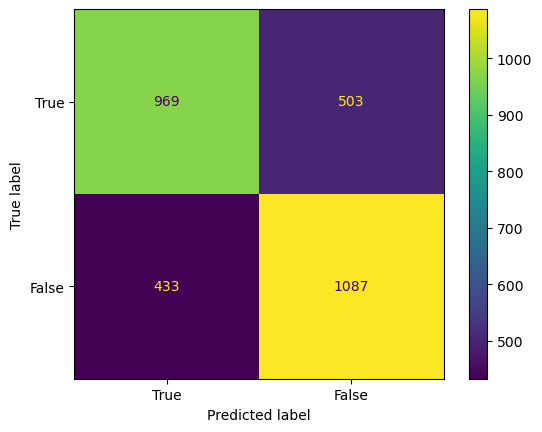

In [59]:
###### rf = RandomForestClassifier()

parameters = {'n_estimators': [20,60,100,120],
               'max_features': [0.2,0.6,1.0],
               'max_depth': [2,8,10,15,20],
              'max_samples':[0.5,0.75,1.0]
             }

random_search = RandomizedSearchCV(estimator = rf, param_distributions = parameters, cv=5, n_jobs = -1)
random_search.fit(x_train_bal, y_train_bal)
output = random_search.best_params_

clf = RandomForestClassifier(n_estimators= output["n_estimators"], max_features=output["max_features"], max_depth=output["max_depth"], max_samples=output["max_samples"])
clf.fit(x_train_bal, y_train_bal)
y_pred_bal = clf.predict(x_test_bal)
cfm = confusion_matrix(y_test_bal,y_pred_bal)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print('\n\nACCURACY: ',accuracy_score(y_test_bal,y_pred_bal)*100)
print('\n\nROC AUC: ',roc_auc_score(y_test_bal,y_pred_bal)*100)

In [60]:
TP = 971
FP = 440
FN = 501
TN = 1080
print(f"Precision: {TP/(TP+FP)} Recall: {TP/(TP+FN)}")
print(f"F1 score: {2* (TP/(TP+FP)) * (TP/(TP+FN)) / ((TP/(TP+FP)) + (TP/(TP+FN)))}")

Precision: 0.6881644223954642 Recall: 0.6596467391304348
F1 score: 0.6736038848421783


In [62]:
output

{'n_estimators': 120, 'max_samples': 0.5, 'max_features': 1.0, 'max_depth': 10}

### Inferences

While both the F1 score and ROC AUC are useful metrics, they provide different perspectives on model performance. The F1 score focuses on the balance between precision and recall, whereas ROC AUC assesses the overall discriminative power of the model.

Since our priority is to evaluate the model's ability to distinguish between positive and negative instances across different classification thresholds, ROC AUC is a more appropriate metric.

Based on the findings, it is evident that Model 4, which utilizes a Random Forest algorithm on a balanced dataset, outperforms other models. It achieves an accuracy of approximately 69% and an ROC/AUC score close to 69%. Also the results suggest that the features in the dataset have a limited correlation with the dependent variable (booking_complete), which contriubutes to performance of the model. 